In [1]:
import pandas as pd
import numpy as np
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 CONFIGURA TUS DATOS
DB_USER = "postgres"
DB_PASS = "1994"
DB_HOST = "localhost"
DB_NAME = "smartcity"

engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}")

print("Conexión establecida correctamente!")


Matplotlib is building the font cache; this may take a moment.


Conexión establecida correctamente!


In [2]:
df_daylio = pd.read_sql("SELECT * FROM fact_daylio;", engine)
df_mood = pd.read_sql("SELECT * FROM dim_mood;", engine)
df_actividad = pd.read_sql("SELECT * FROM dim_actividad;", engine)
df_daylio_actividad = pd.read_sql("SELECT * FROM fact_daylio_actividad;", engine)

df_diario = pd.read_sql("SELECT * FROM fact_diario;", engine)
df_ubicacion = pd.read_sql("SELECT * FROM dim_ubicacion;", engine)


In [3]:
# Merge mood con fact_daylio
daylio_full = df_daylio.merge(df_mood, left_on="mood_id", right_on="id", suffixes=("", "_mood"))

# Merge actividades
daylio_full = daylio_full.merge(df_daylio_actividad, left_on="id", right_on="id_fact_daylio", how="left")
daylio_full = daylio_full.merge(df_actividad, left_on="id_actividad", right_on="id", how="left", suffixes=("", "_act"))

daylio_full.head()


,id,fecha,mood_id,note,id_mood,mood_name,id_fact_daylio,id_actividad,id_act,nombre
0,1,2025-11-19,1,"Hoy comí demasiado en la merienda, pero poco a...",1,bien,1.0,1.0,1.0,emocionado(a)
1,1,2025-11-19,1,"Hoy comí demasiado en la merienda, pero poco a...",1,bien,1.0,2.0,2.0,relajado(a)
2,1,2025-11-19,1,"Hoy comí demasiado en la merienda, pero poco a...",1,bien,1.0,3.0,3.0,cansado(a)
3,1,2025-11-19,1,"Hoy comí demasiado en la merienda, pero poco a...",1,bien,1.0,4.0,4.0,inseguro(a)
4,1,2025-11-19,1,"Hoy comí demasiado en la merienda, pero poco a...",1,bien,1.0,5.0,5.0,ansioso(a)


## Features temporales

In [4]:
daylio_full["fecha"] = pd.to_datetime(daylio_full["fecha"])
daylio_full["year"] = daylio_full["fecha"].dt.year
daylio_full["month"] = daylio_full["fecha"].dt.month
daylio_full["weekday"] = daylio_full["fecha"].dt.day_name()


## Algunas visualizaciones
### Evolución del mood a lo largo del tiempo

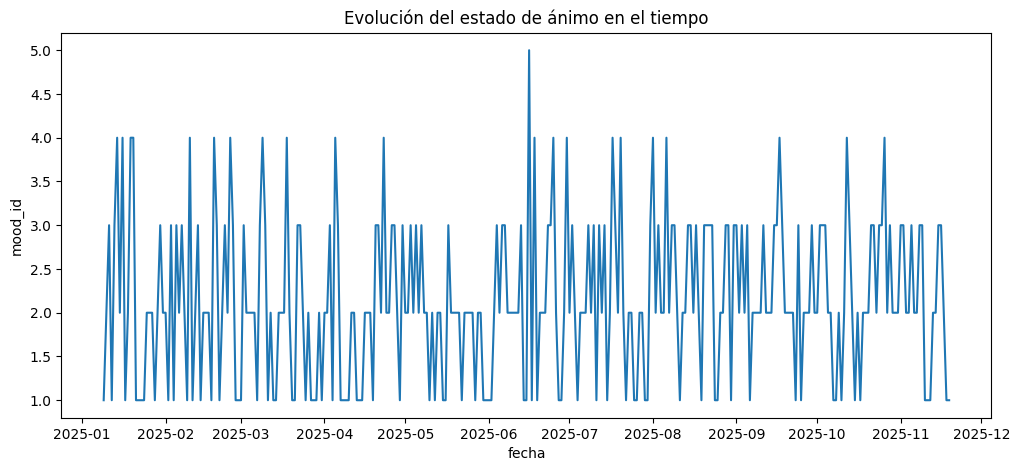

In [5]:
plt.figure(figsize=(12,5))
sns.lineplot(data=daylio_full.drop_duplicates("fecha"), x="fecha", y="mood_id")
plt.title("Evolución del estado de ánimo en el tiempo")
plt.show()


### Distribución del mood

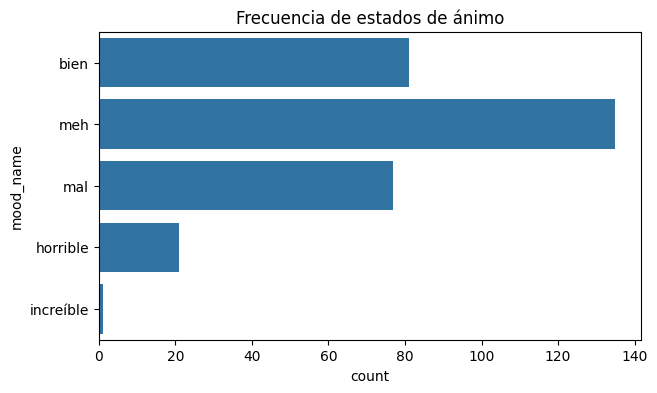

In [6]:
plt.figure(figsize=(7,4))
sns.countplot(y=daylio_full.drop_duplicates("fecha")["mood_name"])
plt.title("Frecuencia de estados de ánimo")
plt.show()


### Relación entre sueño y mood

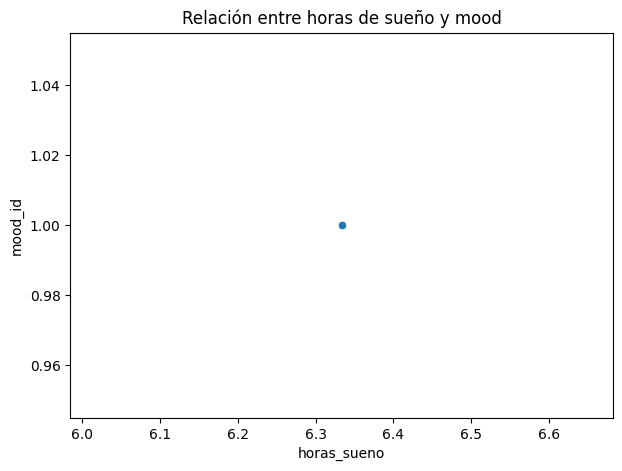

In [ ]:
df = df_diario.merge(df_daylio, left_on="fecha", right_on="fecha")

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="horas_sueno", y="mood_id")
sns.regplot(data=df, x="horas_sueno", y="mood_id", scatter=False)
plt.title("Relación entre horas de sueño y mood")
plt.show()


### Heatmap de correlaciones

/Users/MattTrivino 1/Documents/Data Science projects/smart-city/venv/lib/python3.14/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/MattTrivino 1/Documents/Data Science projects/smart-city/venv/lib/python3.14/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


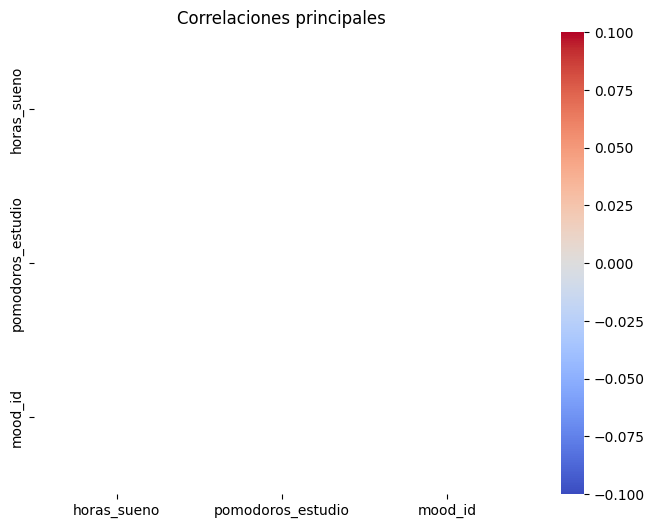

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["horas_sueno", "pomodoros_estudio", "mood_id"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlaciones principales")
plt.show()


### Actividades más asociadas a buen mood

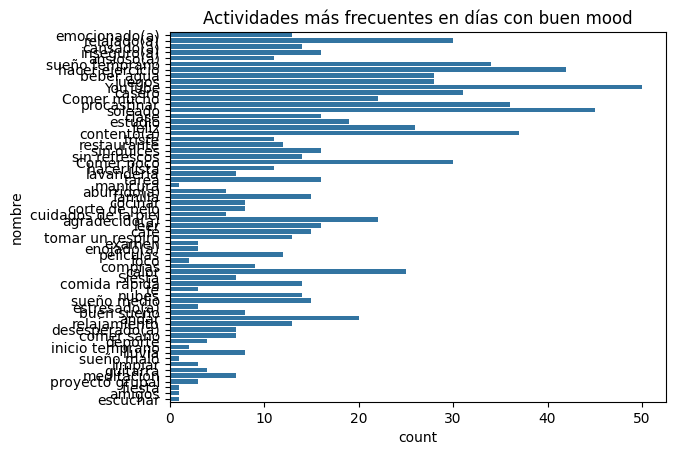

In [9]:
good = daylio_full[daylio_full["mood_name"] == "bien"]
sns.countplot(y=good["nombre"])
plt.title("Actividades más frecuentes en días con buen mood")
plt.show()
